In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


gpg: keybox '/tmp/tmpsoprwrtj/pubring.gpg' created
gpg: /tmp/tmpsoprwrtj/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1


KeyboardInterrupt: ignored

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [1]:
!ls 

datalab  drive


In [2]:
%cd drive/dig_mnist

/content/drive/dig_mnist


In [3]:
from sklearn.datasets import fetch_mldata
from sklearn.cross_validation import train_test_split
from sklearn import datasets
from keras.optimizers import Adam
from keras.utils import np_utils
import numpy as np
import argparse
import cv2
import pandas as pd
from numpy import genfromtxt
 
# load the MNIST digits dataset

#train_file = "train.csv"
#raw_data = genfromtxt(train_file, delimiter=',', skip_header=1)

train = pd.read_csv("train.csv")
test =  pd.read_csv("test.csv")
print (train.shape)
print (test.shape)
train.head(10)

target = train['label']
features = train.drop('label',axis=1)
print(target.shape)
print(features.shape)


/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


(42000, 785)
(28000, 784)
(42000,)
(42000, 784)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


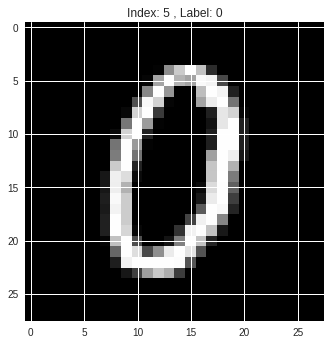

In [4]:
# Show image of 5th row

import matplotlib.pyplot as plt
label = target[5].argmax(axis=0)
img = features.iloc[5].reshape([28,28])
plt.title("Index: {} , Label: {}".format(5, label))
plt.imshow(img, cmap='gray')
plt.show()

In [5]:
for i in range(len(features)):
    features.iloc[i].reshape([28,28])
print(features.iloc[5].shape)
print((features.shape)) 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


(784,)
(42000, 784)


In [6]:
image_size = int(np.sqrt((features.shape)[1]))
print(image_size)

28


In [0]:
X_shape = ((features.shape)[0], image_size, image_size, 1)
y_shape = ((features.shape)[0], 10)
X_data = np.zeros(X_shape)
y_data = np.zeros(y_shape)

In [8]:
for i in range((features.shape[0])):
        data = features.iloc[i].reshape([28,28])
        lab = target.iloc[i]
        #print(lab)
        #print(data)
        X_data[i] = np.array(data / 255.0).reshape(image_size, image_size, 1)
        y_data[i] = np_utils.to_categorical(int(lab), 10) 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [0]:
random_seed = 2
trainData, testData = train_test_split(X_data, test_size=0.1,random_state=random_seed)
trainLabels, testLabels = train_test_split(y_data, test_size=0.1,random_state=random_seed)


In [0]:
LOG_DIR = 'logs'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)


In [16]:
!npm install -g localtunnel

/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/client
/tools/node/lib
└─┬ localtunnel@1.9.0 
  ├─┬ axios@0.17.1 
  │ ├─┬ follow-redirects@1.5.1 
  │ │ └── debug@3.1.0 
  │ └── is-buffer@1.1.6 
  ├─┬ debug@2.6.8 
  │ └── ms@2.0.0 
  ├── openurl@1.1.1 
  └─┬ yargs@6.6.0 
    ├── camelcase@3.0.0 
    ├─┬ cliui@3.2.0 
    │ ├─┬ strip-ansi@3.0.1 
    │ │ └── ansi-regex@2.1.1 
    │ └── wrap-ansi@2.1.0 
    ├── decamelize@1.2.0 
    ├── get-caller-file@1.0.2 
    ├─┬ os-locale@1.4.0 
    │ └─┬ lcid@1.0.0 
    │   └── invert-kv@1.0.0 
    ├─┬ read-pkg-up@1.0.1 
    │ ├─┬ find-up@1.1.2 
    │ │ ├── path-exists@2.1.0 
    │ │ └─┬ pinkie-promise@2.0.1 
    │ │   └── pinkie@2.0.4 
    │ └─┬ read-pkg@1.1.0 
    │   ├─┬ load-json-file@1.1.0 
    │   │ ├── graceful-fs@4.1.11 
    │   │ ├─┬ parse-json@2.2.0 
    │   │ │ └─┬ error-ex@1.3.2 
    │   │ │   └── is-arrayish@0.2.1 
    │   │ ├── pify@2.3.0 
    │   │ └─┬ strip-bom@2.0.0 
    │   │   └── is-utf8@0.2.1 
    │   ├─┬ normal

In [0]:
get_ipython().system_raw('lt --port 6006 >> url.txt 2>&1 &')


In [19]:
! cat url.txt

your url is: https://stupid-dodo-35.localtunnel.me


In [0]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard
import tensorflow as tf
from keras.callbacks import Callback
import os
run_opts = tf.RunOptions(report_tensor_allocations_upon_oom = True)

from keras import backend as K
K.clear_session()

In [0]:
class SensitivitySpecificityCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
      
        normalize=False
        title='Confusion matrix'
        tensor_name = 'image'
        session=tf.Session()   
        img_d_summary_dir = os.path.join('logs', "image")
        img_d_summary_writer = tf.summary.FileWriter(img_d_summary_dir, session.graph)
        x_test = self.validation_data[0]
        y_test = self.validation_data[1]
        #print(y_test)
        # x_test, y_test = self.validation_data
        predictions = self.model.predict(x_test)
        #print(predictions)
        y_test = np.argmax(y_test, axis=-1)
        predictions = np.argmax(predictions, axis=-1)
        #c = confusion_matrix(y_test, predictions)
        correct_labels = y_test
        predict_labels = predictions
        conf = tf.contrib.metrics.confusion_matrix(correct_labels, predict_labels)

        cm=session.run(conf)
        if normalize:
            cm = cm.astype('float')*10 / cm.sum(axis=1)[:, np.newaxis]
            cm = np.nan_to_num(cm, copy=True)
            cm = cm.astype('int')

        np.set_printoptions(precision=2)

        fig = matplotlib.figure.Figure(figsize=(12, 12), dpi=320, facecolor='w', edgecolor='k')
        ax = fig.add_subplot(1, 1, 1)
        im = ax.imshow(cm, cmap='Oranges')

        #classes = [re.sub(r'([a-z](?=[A-Z])|[A-Z](?=[A-Z][a-z]))', r'\1 ', x) for x in labels]
        #classes = ['\n'.join(wrap(l, 40)) for l in classes]
        classes = ['0','1','2','3','4','5','6','7','8','9']
        tick_marks = np.arange(len(classes))

        ax.set_xlabel('Predicted', fontsize=7)
        ax.set_xticks(tick_marks)
        c = ax.set_xticklabels(classes, fontsize=10, rotation=-90,  ha='center')
        ax.xaxis.set_label_position('bottom')
        ax.xaxis.tick_bottom()

        ax.set_ylabel('True Label', fontsize=7)
        ax.set_yticks(tick_marks)
        ax.set_yticklabels(classes, fontsize=10, va ='center')
        ax.yaxis.set_label_position('left')
        ax.yaxis.tick_left()

        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            ax.text(j, i, format(cm[i, j], 'd') if cm[i,j]!=0 else '.', horizontalalignment="center", fontsize=6, verticalalignment='center', color= "black")

        fig.set_tight_layout(True)
        summary = tfplot.figure.to_summary(fig, tag=tensor_name)
        img_d_summary_writer.add_summary(summary)
        img_d_summary_writer.flush()
        img_d_summary_writer.close()
        #return summary

In [0]:
class TrainValTensorBoard(TensorBoard):
    def __init__(self, log_dir='./logs', **kwargs):
        # Make the original `TensorBoard` log to a subdirectory 'training'
        training_log_dir = os.path.join(log_dir, 'training')
        super(TrainValTensorBoard, self).__init__(training_log_dir, **kwargs)
        
        # Log the validation metrics to a separate subdirectory
        self.val_log_dir = os.path.join(log_dir, 'validation')
        #self.img_d_summary_dir = os.path.join(log_dir, "image")

    def set_model(self, model):
        # Setup writer for validation metrics
        self.val_writer = tf.summary.FileWriter(self.val_log_dir)
        #self.img_d_summary_writer = tf.summary.FileWriter(self.img_d_summary_dir)
        super(TrainValTensorBoard, self).set_model(model)

    def on_epoch_end(self, epoch, logs=None):
        # Pop the validation logs and handle them separately with
        # `self.val_writer`. Also rename the keys so that they can
        # be plotted on the same figure with the training metrics
        #img_d_summary =  TrainValTensorBoard.plot_confusion_matrix(correct_labels, predict_labels, labels, tensor_name='image')
        logs = logs or {}
        val_logs = {k.replace('val_', ''): v for k, v in logs.items() if k.startswith('val_')}
        for name, value in val_logs.items():
            summary = tf.Summary()
            summary_value = summary.value.add()
            summary_value.simple_value = value.item()
            summary_value.tag = name
            self.val_writer.add_summary(summary, epoch)
            #self.img_d_summary_writer.add_summary(img_d_summary, epoch)
        self.val_writer.flush()
        #self.img_d_summary_writer.flush()
        
        # Pass the remaining logs to `TensorBoard.on_epoch_end`
        logs = {k: v for k, v in logs.items() if not k.startswith('val_')}
        super(TrainValTensorBoard, self).on_epoch_end(epoch, logs)

    def on_train_end(self, logs=None):
        super(TrainValTensorBoard, self).on_train_end(logs)
        self.val_writer.close()

In [0]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Convolution2D,MaxPooling2D
from keras.layers.core import Activation,Dropout,Flatten,Dense
from keras.optimizers import SGD, RMSprop, Adam    
model = Sequential()
# first set of CONV => RELU => POOL

model.add(Convolution2D(32, (5, 5),input_shape=(28, 28, 1)))
model.add(BatchNormalization(axis=-1))
model.add(Activation("relu"))

model.add(Convolution2D(32, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(BatchNormalization(axis=-1))

# second set of CONV => RELU => POOL
model.add(Convolution2D(64,(3, 3),input_shape=(28, 28, 1)))
model.add(BatchNormalization(axis=-1))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(BatchNormalization(axis=-1))
#model.add(Dropout(0.25))

# third set of CONV => RELU => POOL
model.add(Convolution2D(64,(3, 3),input_shape=(28, 28, 1)))
model.add(BatchNormalization(axis=-1))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

# set of FC => RELU layers
model.add(Flatten())
model.add(BatchNormalization(axis=-1))
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.8))

# softmax classifier
model.add(Dense(10))
model.add(Activation("softmax"))


In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 22, 22, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 22, 22, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
__________

In [35]:
# initialize the optimizer and model
print("Compiling model...")

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001),metrics=["accuracy"])

Compiling model...


In [0]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 64
gen = ImageDataGenerator(
        rotation_range=8,
        width_shift_range=0.08,
        shear_range=0.1,
        height_shift_range=0.08,
        zoom_range=0.1)

train_gen = gen.flow(trainData, trainLabels, batch_size=batch_size)
test_gen = gen.flow(testData, testLabels, batch_size=batch_size)


In [0]:
print("training...")
history = model.fit_generator(train_gen, steps_per_epoch=train_gen.n, epochs=5, validation_data=test_gen,validation_steps=test_gen.n ,callbacks=[TrainValTensorBoard(write_graph=False)])
#print(trainData.shape)
#history = model.fit_generator(train_gen, steps_per_epoch=train_gen.n, epochs=3, validation_data=test_gen, validation_steps=test_gen.n)

#model.fit(trainData, trainLabels, batch_size=300, epochs=5, validation_data=(testData, testLabels) , callbacks=[SensitivitySpecificityCallback(),TrainValTensorBoard(write_graph=False)])

In [0]:
import matplotlib.pyplot as plt  
print(history.history.keys())  
   
plt.figure(1)  
   
# summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
# summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  

In [0]:
data = gen.flow(X_data, y_data, batch_size=64)

In [17]:
model.fit_generator(data, steps_per_epoch=train_gen.n, epochs=1)

Epoch 1/1
 1811/37800 [>.............................] - ETA: 23:10 - loss: 0.0025 - acc: 0.9992 - lr: 0.0010

 5028/37800 [==>...........................] - ETA: 20:39 - loss: 0.0023 - acc: 0.9992 - lr: 0.0010

 7036/37800 [====>.........................] - ETA: 19:19 - loss: 0.0023 - acc: 0.9993 - lr: 0.0010

 9456/37800 [======>.......................] - ETA: 17:51 - loss: 0.0022 - acc: 0.9993 - lr: 0.0010

11708/37800 [========>.....................] - ETA: 16:26 - loss: 0.0022 - acc: 0.9993 - lr: 0.0010

13707/37800 [=========>....................] - ETA: 15:13 - loss: 0.0022 - acc: 0.9993 - lr: 0.0010

16592/37800 [============>.................] - ETA: 13:27 - loss: 0.0021 - acc: 0.9993 - lr: 0.0010

18758/37800 [=============>................] - ETA: 12:05 - loss: 0.0021 - acc: 0.9993 - lr: 0.0010

22337/37800 [================>.............] - ETA: 9:49 - loss: 0.0021 - acc: 0.9993 - lr: 0.0010

24662/37800 [==================>...........] - ETA: 8:20 - loss: 0.0021 - acc: 0.9993 - lr: 0.0010

27051/37800 [====================>.........] - ETA: 6:49 - loss: 0.0021 - acc: 0.9993 - lr: 0.0010

29638/37800 [======================>.......] - ETA: 5:11 - loss: 0.0021 - acc: 0.9993 - lr: 0.0010

32194/37800 [========================>.....] - ETA: 3:33 - loss: 0.0020 - acc: 0.9993 - lr: 0.0010

34356/37800 [==========================>...] - ETA: 2:11 - loss: 0.0020 - acc: 0.9993 - lr: 0.0010

36375/37800 [===========================>..] - ETA: 54s - loss: 0.0020 - acc: 0.9993 - lr: 0.0010

37800/37800 [==============================] - 1443s 38ms/step - loss: 0.0020 - acc: 0.9993 - lr: 0.0010


In [29]:
print(test.shape)
image_size = int(np.sqrt((features.shape)[1]))
print(image_size)
X2_shape = ((test.shape)[0], image_size, image_size, 1)
y2_shape = ((test.shape)[0], 10)
X2_data = np.zeros(X2_shape)
y2_data = np.zeros(y2_shape)

(28000, 784)
28


In [30]:
for i in range((test.shape[0])):
        data = test.iloc[i].reshape([28,28])
        X2_data[i] = np.array((data / 255.0)).reshape(image_size, image_size, 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [0]:
y_test_pred = np.array([], dtype=np.int64)
num=[]
for i in range(0,(test.shape)[0]):
    probs = model.predict(X2_data[np.newaxis, i])
    prediction = probs.argmax(axis=1) 
    y_test_pred=np.append(y_test_pred,int(prediction))
    num.append(i+1)
    


In [0]:
def output(test_predict, file_name):
    with open(file_name, 'w') as myfile:
        print('ImageId,Label', file = myfile)
        for i in range(len(test_predict)):
            print(int(test_predict[i]))
            print(i + 1, ',', int(test_predict[i]), file = myfile, sep = '')
    #print("Done writing")

In [0]:
output(y_test_pred,"sample_submission.csv")

In [0]:
model.save_weights('acc_weights.h5')